In [115]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [116]:
df_ratings = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

# # display shape of the dataset
print(df_ratings.shape)

# # display top 5 rows of the dataset to get an idea
print(df_ratings.head())

(15509, 10)
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Ka

In [117]:
# print information about the dataset
print(df_ratings.info())

# print statistical description of the dataset
print(df_ratings.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


<Axes: >

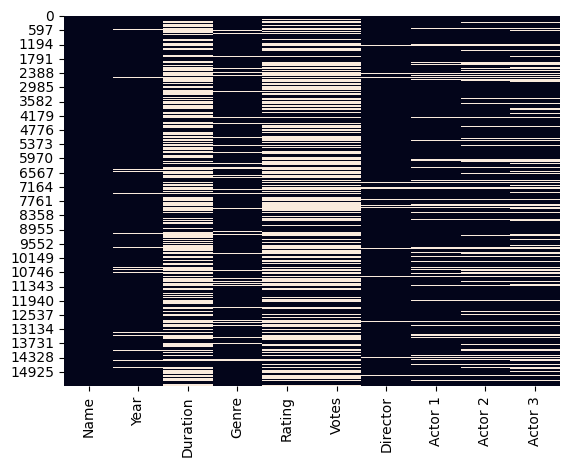

In [118]:
# visualize missing values in the dataset
sns.heatmap(df_ratings.isnull(), cbar=False)

In [119]:
# print number of missing values in each column
print(df_ratings.isnull().sum())


# calculate the threshold for missing values
threshold_Na = len(df_ratings) * 0.05
print(f"threshold_Na: {threshold_Na}")

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
threshold_Na: 775.45


In [120]:
#Checking the unique values in each column
for col in df_ratings.select_dtypes(include = "object"):
    print(f"The unique values in Column: {col}")
    print(df_ratings[col].unique())

The unique values in Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
The unique values in Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '

In [121]:
#Checking the values in each column
for col in df_ratings.select_dtypes(include = "object"):
    print(f"the values in Column: {col}")
    print(df_ratings[col].value_counts(), "\n\n")

the values in Column: Name
Name
Anjaam                7
Mamta                 7
Zindagi               6
Musafir               6
Albela                5
                     ..
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Hameshaa              1
Hamid                 1
Zulm-O-Sitam          1
Name: count, Length: 13838, dtype: int64 


the values in Column: Year
Year
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: count, Length: 102, dtype: int64 


the values in Column: Duration
Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
201 min      1
206 min      1
198 min      1
218 min      1
250 min      1
Name: count, Length: 182, dtype: int64 


the values in Column: Genre
Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Roma

In [122]:
# make a copy of the dataset
df_filltered = df_ratings.copy()

print(df_filltered.shape)

# drop columns with missing values more than threshold
df_filltered.dropna(inplace=True)

# display the information about the dataset
print(df_filltered.info())

# check missing values
print(df_filltered.isnull().sum())

(15509, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB
None
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [123]:
# extract the year from the 'Year' column
df_filltered['Year'] = df_filltered['Year'].str.extract(r"(\d+)")

# convert the 'Year' column to integer
df_filltered['Year'] = df_filltered['Year'].astype('int64')

print(df_filltered['Year'].unique())
print(df_filltered['Year'].dtypes)

[2019 1997 2005 2012 2014 2004 2016 1991 2018 2010 1958 2021 2017 2009
 1993 2002 2008 1994 2007 2003 1998 1979 1974 2015 2006 1981 2020 1985
 2013 2011 1988 1987 1999 1973 1968 1982 1977 1950 1969 1948 1990 1989
 2001 2000 1953 1978 1963 1992 1976 1984 1986 1966 1975 1980 1967 1970
 1952 1972 1971 1964 1954 1962 1957 1965 1996 1995 1956 1955 1936 1983
 1951 1961 1959 1949 1960 1946 1940 1945 1938 1941 1942 1935 1937 1947
 1931 1933 1943 1944 1932 1939 1934]
int64


In [124]:
# extract the duration in numbers from the "Duration" column
df_filltered['Duration'] = df_filltered['Duration'].str.extract(r"(\d+)")
# convert the 'Duration' column to integer
df_filltered['Duration'] = df_filltered['Duration'].astype('int64')
# print to check the result
print(df_filltered['Duration'].unique())
print(df_filltered['Duration'].dtypes)

[109 110 147 142  82 116  96 120 161 166 102  87 132 105 146 168 158 126
  94 138 124 144 157 136 107 113  80 122 149 148 130 121 188 115 103 114
 170 100  99 140 128  93 125 145  75 111 134 104  92 137 127 119 135  90
 150 151  95 112 143 177 117 123  72 154 175 153  78 139 133 180  46 164
 162 171 160 152 163 165 141 129 156 240 172  88 155 167 106 193 108 195
 174  81 178  58 184  97 176 169 131  77  91  86  84 173 118 181 300  70
 101  79  65  48 183 159  83  68  89 201  64 186  74  85  98  49  60 207
  76 185  59 187 216  51  71  45  73  57 191 321 199 179  47 206  63 211
 247  56 213 210 190 223 189 224 202  69 255 197 182  66 214 208  21 200
 192  50  54 238  62  67  52 204 235 217  61 250]
int64


In [125]:
# extract the True letters(Text) from the "Name" column
df_filltered['Name'] = df_filltered['Name'].str.extract('([A-Za-z\s\'\-]+)')

# print to check the result
print(df_filltered['Name'].unique())

['Gadhvi ' 'Yaaram' 'Aur Pyaar Ho Gaya' ... 'Zulm Ki Zanjeer' 'Zulmi'
 'Zulm-O-Sitam']


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\tarek\AppData\Local\Temp\ipykernel_16700\3516388568.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_filltered['Name'] = df_filltered['Name'].str.extract('([A-Za-z\s\'\-]+)')


In [126]:
# replace the , to keep only numerical part
df_filltered['Votes'] = df_filltered['Votes'].str.replace(',', '')

# convert the 'Votes' column to integer
df_filltered['Votes'] = df_filltered['Votes'].astype('int64')
# print to check the result
print(df_filltered['Votes'].unique())
print(df_filltered['Votes'].dtypes)

[    8    35   827 ... 70344   408  1496]
int64


In [127]:
#checking duplicate values by Name and Year
duplicated_vals = df_filltered.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicated_vals.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6062,India's Daughter,2015,63,"Documentary, Biography, Crime",8.2,1998,Leslee Udwin,Asha Devi,Badri Singh,Satendra
6063,India's Daughter,2015,120,"Action, Crime, Drama",6.9,21,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash
6217,ISIS,2017,92,Action,6.4,18,Yuvraj Kumar,Amrityan,Moshin Bhat,Snighdadeep Chatterji
6219,ISIS,2017,135,Action,7.5,8,Yuvraj Kumar,Yuvraj Kumar,Manon Faure,Rasheed Naz
8401,M,2014,118,"Drama, Romance",3.9,14,Suresh Jain,Seema Dogra,Paras Sharma,Sushma Sharma


In [128]:
# drop the duplicate values
df_filltered.drop_duplicates(subset=['Name'], keep='last', inplace=True)
print(df_filltered.shape)

(5283, 10)
